In [5]:
import pandas as pd
df = pd.read_csv('gisette_test.data', header = None, delim_whitespace = True)
df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,983,0,956,0,0,0,0,520,0,0,...,0,0,0,968,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,695,...,960,0,0,687,0,0,0,0,0,0
2,0,0,703,0,0,0,0,0,0,0,...,0,0,0,758,0,0,983,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,987,0,0,0,0,0,498,0,0,0
4,0,0,0,0,0,0,0,980,0,976,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0,0,0,0,0,0,0,773,0,0,...,0,921,0,538,831,0,976,0,769,0
6496,712,0,0,0,0,0,0,976,0,0,...,0,0,0,0,987,0,0,0,0,906
6497,0,0,0,0,0,0,0,0,0,983,...,0,0,0,812,0,0,0,0,0,0
6498,0,0,0,0,0,0,0,0,0,0,...,995,0,0,508,0,0,0,0,991,0


In [7]:
feature_df = df.iloc[:, 2:]
label_df = df.iloc[:, 1]

In [8]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(feature_df)
import numpy as np
np.mean(x), np.std(x)

(-1.0741143766176785e-18, 0.9955885086678309)

In [12]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
evr = pca.explained_variance_ratio_
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr)))

 0: 0.0286
 1: 0.0227
 2: 0.0166
 3: 0.0163
 4: 0.0119
 5: 0.0109
 6: 0.0099
 7: 0.0087
 8: 0.0070
 9: 0.0067
10: 0.0066
11: 0.0056
12: 0.0053
13: 0.0048
14: 0.0046
15: 0.0045
16: 0.0040
17: 0.0038
18: 0.0038
19: 0.0036
20: 0.0035
21: 0.0034
22: 0.0032
23: 0.0030
24: 0.0029
25: 0.0029
26: 0.0027
27: 0.0027
28: 0.0027
29: 0.0026
30: 0.0025
31: 0.0025
32: 0.0024
33: 0.0023
34: 0.0023
35: 0.0022
36: 0.0022
37: 0.0021
38: 0.0021
39: 0.0021
40: 0.0020
41: 0.0019
42: 0.0019
43: 0.0019
44: 0.0018
45: 0.0018
46: 0.0017
47: 0.0017
48: 0.0017
49: 0.0017
50: 0.0016
51: 0.0016
52: 0.0016
53: 0.0015
54: 0.0015
55: 0.0015
56: 0.0015
57: 0.0015
58: 0.0014
59: 0.0014
60: 0.0014
61: 0.0014
62: 0.0014
63: 0.0013
64: 0.0013
65: 0.0013
66: 0.0013
67: 0.0013
68: 0.0012
69: 0.0012
70: 0.0012
71: 0.0012
72: 0.0012
73: 0.0012
74: 0.0012
75: 0.0012
76: 0.0011
77: 0.0011
78: 0.0011
79: 0.0011
80: 0.0011
81: 0.0011
82: 0.0011
83: 0.0011
84: 0.0011
85: 0.0010
86: 0.0010
87: 0.0010
88: 0.0010
89: 0.0010
90: 0.0010

Text(0.5, 0, 'Number of Components')

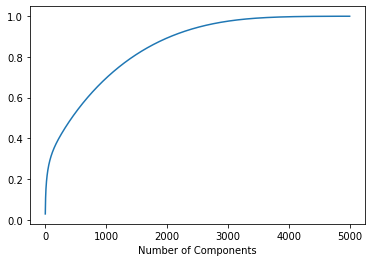

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.cumsum(evr))
plt.xlabel("Number of Components")

In [15]:
pca_four_d = PCA(n_components = 4).fit_transform(x)
pca_four_d_df = pd.DataFrame(pca_four_d, columns = ['PC1', 'PC2', 'PC3', 'PC4'])


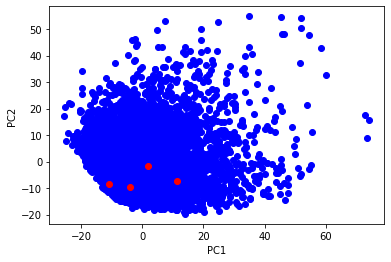

In [17]:
plt.figure()
plt.xlabel('PC1')
plt.ylabel('PC2')
targets = [0, 983]
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = label_df == target
    plt.scatter(pca_four_d_df.loc[indicesToKeep, 'PC1'], 
               pca_four_d_df.loc[indicesToKeep, 'PC2'],
               c = color)

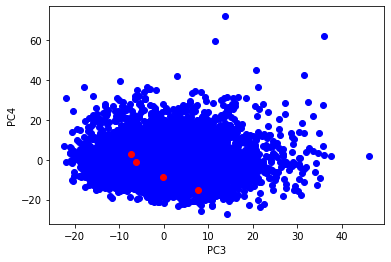

In [19]:
plt.figure()
plt.xlabel('PC3')
plt.ylabel('PC4')
targets = [0, 983]
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = label_df == target
    plt.scatter(pca_four_d_df.loc[indicesToKeep, 'PC3'], 
               pca_four_d_df.loc[indicesToKeep, 'PC4'],
               c = color)